<a href="https://colab.research.google.com/github/StetskoSergey/pida5_stetsko/blob/master/mds%20FinalTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задание 1

In [0]:
import numpy as np
from matplotlib import pyplot as plt
import math


Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [0]:
raitings = [[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
            [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
            [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
            [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
            [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
            [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
            [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
            [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
            [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
            [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]]

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [0]:
#Скалярное произведение векторов, нормированное
#np.dot(x,y)/math.sqrt(np.dot(x,x)*np.dot(y,y))
# нужно найти максимум по списку
sp = [(i,raitings[i]) for i in range(len(raitings))]

def scal(x,y):
  if x == y: # чтобы вектор сам на себя не оставался в выборке
    return 0
  return np.dot(x,y)/math.sqrt(np.dot(x,x)*np.dot(y,y))
# нужно составить пары значений и взять от них максимум по каждой группе пар
def max_sp(n):
  return max(sp, key=lambda p: scal(p[1],sp[n][1]))

[(i[0] , max_sp(i[0])[0]) for i in sp]


[(0, 8),
 (1, 4),
 (2, 9),
 (3, 9),
 (4, 8),
 (5, 9),
 (6, 3),
 (7, 5),
 (8, 0),
 (9, 2)]

<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [0]:
#метод svd спектральное разложение матрицы
from sklearn.decomposition import TruncatedSVD

def TruncClassifier(X, n_components=5):
  svd = TruncatedSVD(n_components = n_components)
  X_reduced = svd.fit_transform(X)
  return X_reduced, svd 

TruncClassifier(raitings, n_components=5)  

(array([[23.41982063, -5.36092136,  3.83196779, -4.06950174,  1.10267269],
        [24.76774917,  4.52188701,  1.35815965,  1.58128545,  8.59912002],
        [22.27728589, -6.96492049, -4.84461485, -0.47661647,  3.37152266],
        [19.4257757 ,  2.64575227, -6.86014009, -4.76604765,  1.96075707],
        [22.8146354 ,  0.51464093,  7.70180188,  4.42379773,  1.29124163],
        [21.76961656,  1.94294987, -4.56934779,  8.32306487, -2.21887359],
        [21.23427453,  9.78047778,  1.16340271, -4.86074521, -2.60815471],
        [19.97476815,  4.00048677, -1.67456316,  1.1512346 , -3.5637169 ],
        [26.39306998, -3.03090482,  5.86422753, -1.67503491, -3.71500141],
        [29.94016844, -4.82012297, -3.48912415,  0.05527083, -3.62526487]]),
 TruncatedSVD(algorithm='randomized', n_components=5, n_iter=5,
              random_state=None, tol=0.0))

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

$2tg(sin(x)+cos(2x+3))*(1 + tg^2(sin(x)+cos(2x+3)))*(cos(x)-2*sin(2x+3))$

In [0]:
from scipy.misc import derivative

def f(x):
    return math.tan(math.sin(x) + math.cos(2*x+3))**2
derivative(f, 1.0, dx=1e-6)

55.3859176464222

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [0]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

In [0]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [0]:
x = [0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ]

In [0]:
fx = [  0.        , -12.01819092, -18.90968634, -17.68786571,
        -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
        19.22059845,   9.48411207,  -3.22273056, -13.48576488,
       -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
        22.12489421,  24.20292139,  18.04522521,   6.33211092]

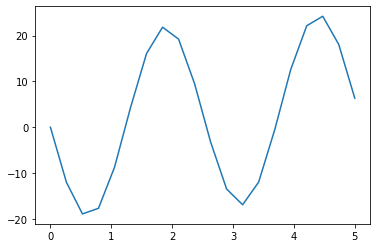

In [45]:
plt.plot(x, fx)
plt.show()

In [0]:
def error(params):
    return np.sum([np.abs(fx[i] - f(x[i], params[0], params[1])) for i in range(len(x))])

In [59]:
from scipy.optimize import dual_annealing
from scipy.optimize import differential_evolution
from scipy.optimize import basinhopping


bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(error, bounds, seed=42)
print(result)
print('Параметры a, b - {}'.format(result.x))

     fun: 1.5129809911584857e-06
     jac: array([133.48417518, 502.62139872])
 message: 'Optimization terminated successfully.'
    nfev: 2073
     nit: 66
 success: True
       x: array([ 3. , -2.5])
Параметры a, b - [ 3.  -2.5]


### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

Text(0.5, 0, '$x$')

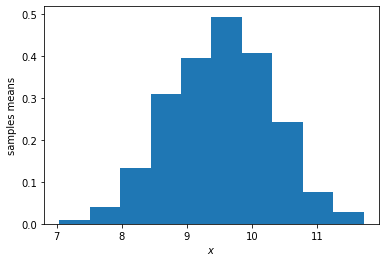

In [18]:
n = 20

sp = range(n)
data = [np.mean([np.random.choice(sp) for i in range(50)]) for j in range(1000)]
plt.hist(data, density=True)

plt.ylabel('samples means')
plt.xlabel('$x$')

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, -4],

 [1, 1]]

In [3]:
#собственные вектора
m = [[1,-4],[1,1]]

w, v = np.linalg.eig(m)
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(np.transpose(v)[i]))

Собственное значение (1+2.0000000000000004j)
соответствующий ему собственный вектор [0.89442719+0.j        0.        -0.4472136j]
Собственное значение (1-2.0000000000000004j)
соответствующий ему собственный вектор [0.89442719-0.j        0.        +0.4472136j]
